## Kernel-based Learning: Support Vector Regression(SVM)
“SVR은 데이터에 노이즈가 있다고 가정하며, 이러한 점을 고려하여 노이즈가 있는 실제 값을 완벽히 추정하는것을 추구하지 않는다. 따라서 적정 범위(2
) 내에서는 실제값과 예측값의 차이를 허용한다.”

“원공간(Input space)에서의 데이터를 매핑함수
(x)를 통해 선형으로 구성할 수 있는 고차원 공간(Feature space)로 매핑한 뒤 데이터를 잘 설명하는 선형회귀선을 찾자.”

선형성을 기반으로 하는 SVR은 원공간이 아닌 고차원공간에서 학습 -> 비선형성을 띄는 회귀식을 구성 가능

### 1.랜덤 데이터 생성
삼각함수를 사용하여 비선형성을 갖는 데이터를 생성하고, 일부 난수에 대해 노이즈를 추가

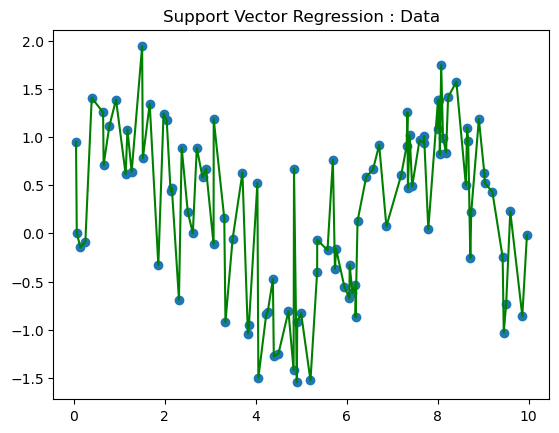

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# X : 0-10 사이 난수 100개 생성
# Y : sin(x)를 통해 비선형 데이터 생성
X = np.sort(10*np.random.rand(100,1), axis=0)
y = np.sin(X).ravel()

# 일부 y값에 NOISE 추가
y[::5] +=2*(0.5-np.random.rand(20))           
y[::4] +=3*(0.5-np.random.rand(25))
y[::1] +=1*(0.5-np.random.rand(100))

plt.scatter(X, y) 
plt.title("Support Vector Regression : Data")

plt.plot(X,y, 'g')
plt.show()


In [10]:
import numpy as np
from sklearn import datasets
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.utils import shuffle

data = datasets.load_boston()

X, y = shuffle(data.data, data.target, random_state = 7)

num_training = int(0.8 * len(X))
X_train, y_train = X[:num_training], y[:num_training]
X_test, y_test = X[num_training:], y[num_training:]

# Create Support Vector Regression model
# kernel : 선형 커널
# C : 학습 오류에 대한 패널티, C 값이 클 수록 모델이 학습 데이터에 좀 더 최적화 됨, 너무 크면 오버피팅 발생
# Epsilon : 임계값, 예측한 값이 GT 범위 안에 있으면 패널티 부여 X
sv_regressor = SVR(kernel='linear', C=1.0, epsilon=0.1)

sv_regressor.fit(X_train, y_train)

y_pred = sv_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

test_data = [3.7, 0, 18.4, 1, 0.87, 5.95, 91, 2.5052, 26, 666, 20.2, 351.34, 15.27]
print(sv_regressor.predict([test_data])[0])

c:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

18.521707478563368
